# Importing necessary libraries


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Loading the dataset and printing top 5 rows


In [2]:
df = pd.read_csv(r"C:\Users\FAUZAN\Downloads\creditcard_2023.csv\creditcard_2023.csv")
print("Dataset Sample:\n", df.head())

Dataset Sample:
    id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27      

In [3]:
print(df.columns)


Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


# Dropping the id column

In [4]:
df = df.drop(columns=['id'], axis=1)


In [5]:
print(df.columns)


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


In [6]:
df.head(5)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


# Checking the information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

# Checking the descriptive statistics of the dataset

In [8]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


# Checking the class distribution

In [9]:
class_counts = df['Class'].value_counts()
print("\nClass distribution:")
print(class_counts)

# Percentage distribution for clarity
class_percent = df['Class'].value_counts(normalize=True) * 100
print("\nClass distribution (percentage):")
print(class_percent)


Class distribution:
Class
0    284315
1    284315
Name: count, dtype: int64

Class distribution (percentage):
Class
0    50.0
1    50.0
Name: proportion, dtype: float64


# Splitting features and target variable


In [10]:
X = df.drop('Class', axis=1)
y = df['Class']
print("Features Shape:", X.shape)
print("Target Shape:", y.shape)

Features Shape: (568630, 29)
Target Shape: (568630,)


# Now doing training,testing, split and scalling the features


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a dictionary of models, and then training and evalutating the each model

In [12]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', scale_pos_weight=(y == 0).sum() / (y == 1).sum(), random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy of {name}: {accuracy:.3f}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)
    results[name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": conf_matrix
    }
    results[name] = accuracy




Training Logistic Regression...
Accuracy of Logistic Regression: 0.965
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.97      0.96      0.96    113726
weighted avg       0.97      0.96      0.96    113726

Confusion Matrix:
 [[55598  1265]
 [ 2718 54145]]

Training XGBoost...
Accuracy of XGBoost: 1.000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
 [[56829    34]
 [    0 56863]]

Training Decision Tree...
Accuracy of Decision Tree: 0.998
Classification Rep

# Plotting ROC curve for all models

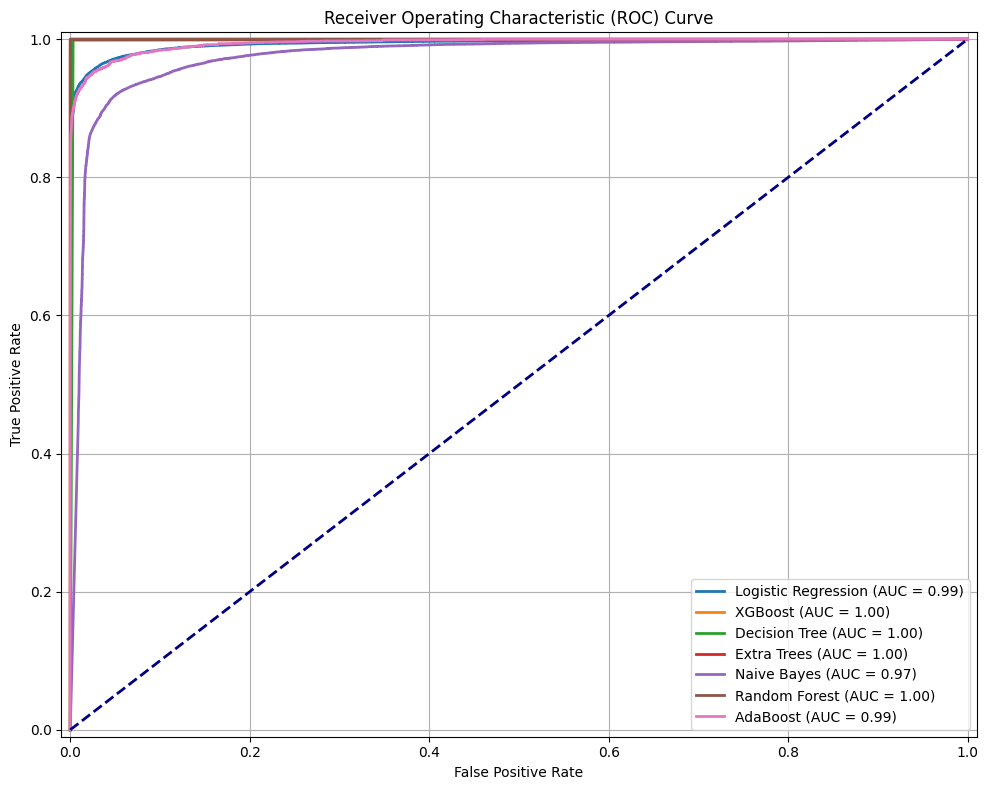

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# First, compute and plot ROC curves for all models
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_scaled)[:, 1]
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test_scaled)
    else:
        continue  # Skip models that can't produce a probability-like score

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


# Plotting Confusion Matrix for all models


Plotting Confusion Matrix for Logistic Regression...


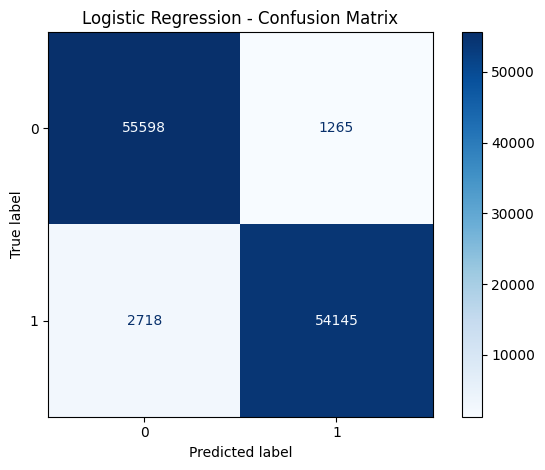


Plotting Confusion Matrix for XGBoost...


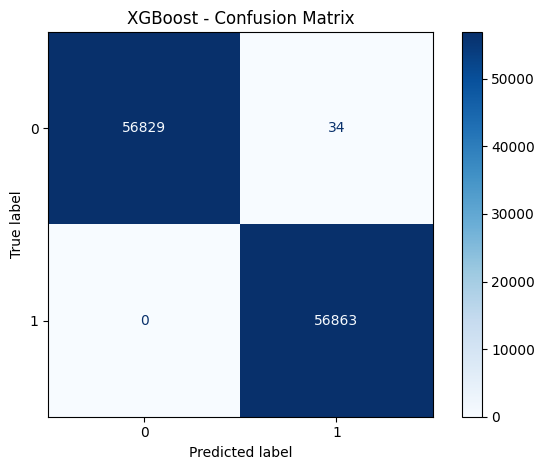


Plotting Confusion Matrix for Decision Tree...


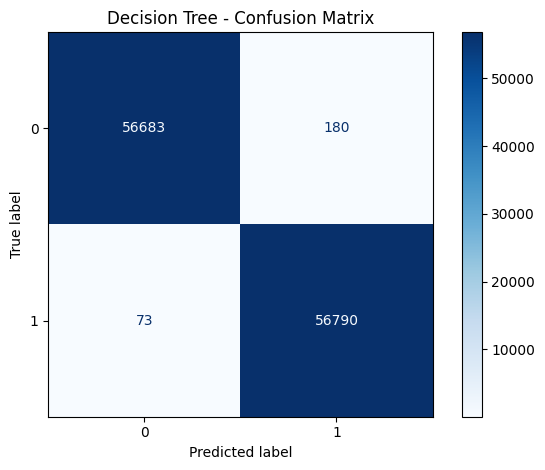


Plotting Confusion Matrix for Extra Trees...


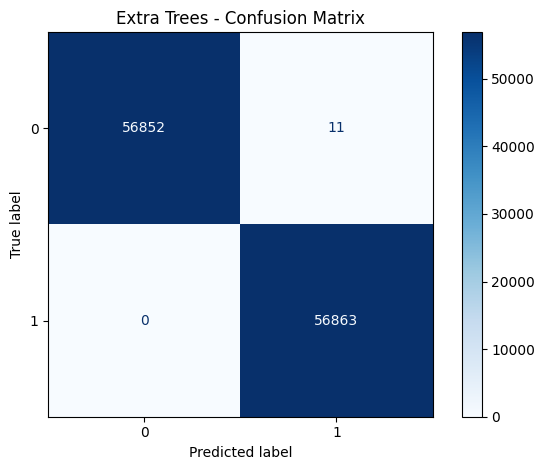


Plotting Confusion Matrix for Naive Bayes...


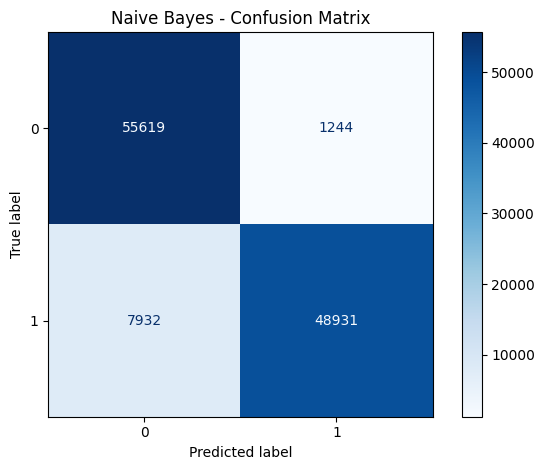


Plotting Confusion Matrix for Random Forest...


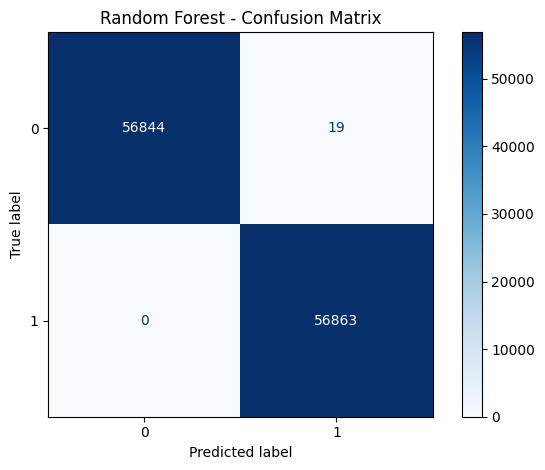


Plotting Confusion Matrix for AdaBoost...


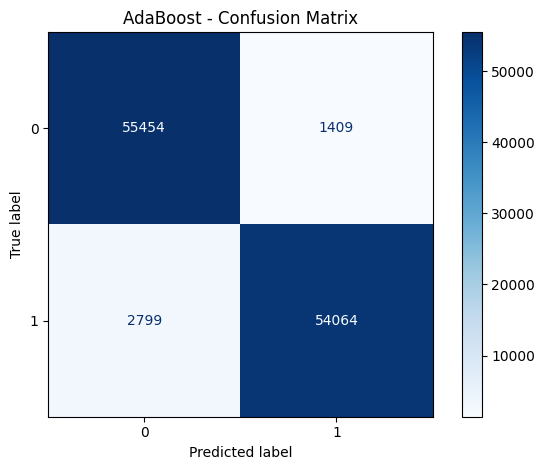

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in models.items():
    print(f"\nPlotting Confusion Matrix for {name}...")
    
    y_pred = model.predict(X_test_scaled)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"{name} - Confusion Matrix")
    plt.tight_layout()
    plt.show()


# Plotting Precision, Recall, and F1-score for all models


Plotting Precision, Recall, and F1-score for Logistic Regression...


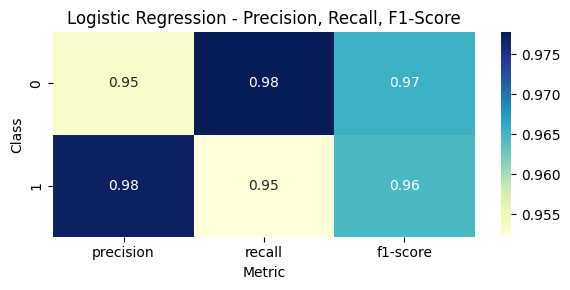


Plotting Precision, Recall, and F1-score for XGBoost...


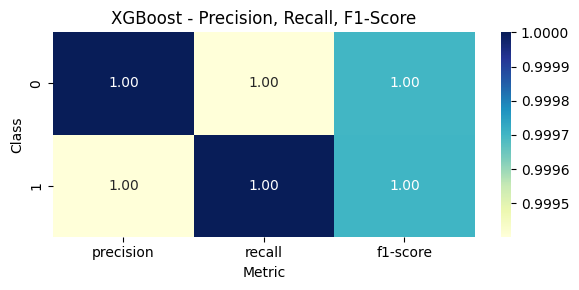


Plotting Precision, Recall, and F1-score for Decision Tree...


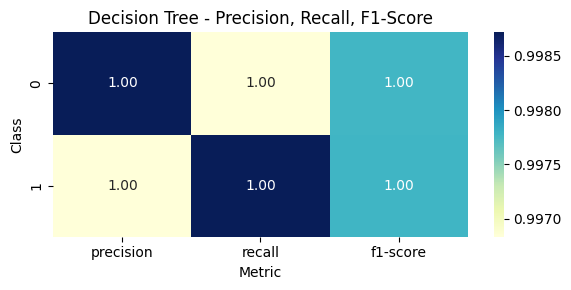


Plotting Precision, Recall, and F1-score for Extra Trees...


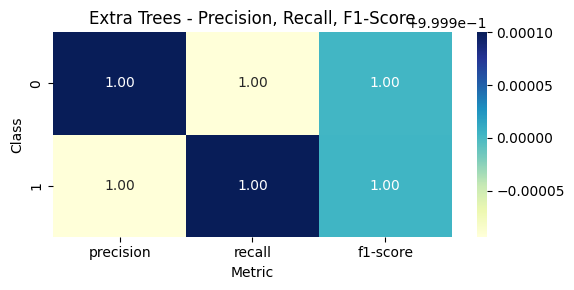


Plotting Precision, Recall, and F1-score for Naive Bayes...


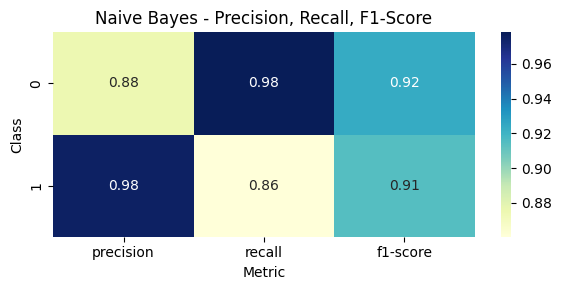


Plotting Precision, Recall, and F1-score for Random Forest...


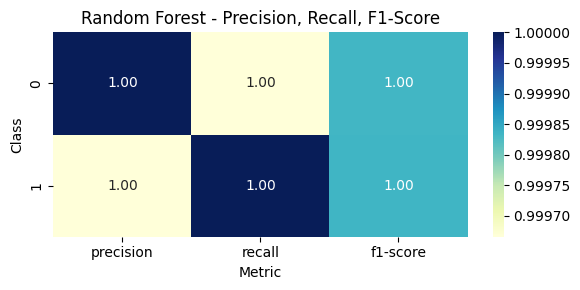


Plotting Precision, Recall, and F1-score for AdaBoost...


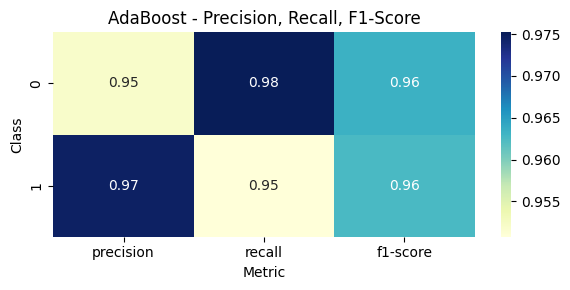

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

for name, model in models.items():
    print(f"\nPlotting Precision, Recall, and F1-score for {name}...")

    y_pred = model.predict(X_test_scaled)
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    
    
    report_df = pd.DataFrame(report_dict).T.loc[['0', '1'], ['precision', 'recall', 'f1-score']]

    plt.figure(figsize=(6, 3))
    sns.heatmap(report_df, annot=True, cmap='YlGnBu', fmt=".2f")
    plt.title(f"{name} - Precision, Recall, F1-Score")
    plt.ylabel("Class")
    plt.xlabel("Metric")
    plt.tight_layout()
    plt.show()


# Printing best performance model

In [16]:
best_model = max(results, key=results.get)
print("\n\nBest Performing Model is:", best_model, "with Accuracy:", f"{results[best_model]:.2f}")



Best Performing Model is: Extra Trees with Accuracy: 1.00


# Plotting best model so far:


Best Model: Extra Trees with accuracy = 0.9999


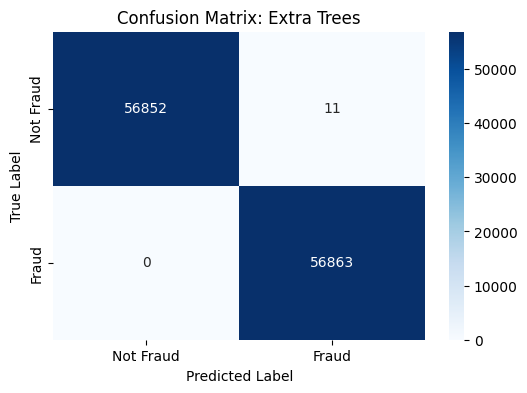

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find best model based on highest accuracy
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name} with accuracy = {results[best_model_name]:.4f}")

# Predict again using best model
y_pred_best = best_model.predict(X_test_scaled)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.title(f"Confusion Matrix: {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# SHAP analysis

SHAP (SHapley Additive exPlanations) is perfect for understanding how each feature impacts a specific prediction or the overall model behavior

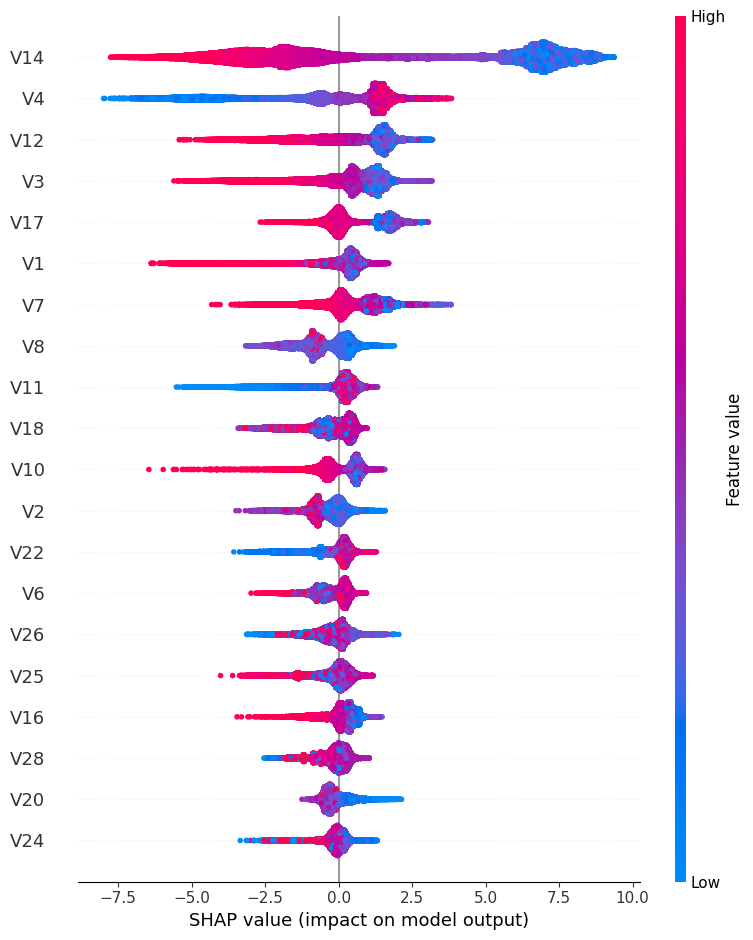

In [18]:
import shap
import matplotlib.pyplot as plt

# Select one model for SHAP analysis — here we use XGBoost as an example
model = models["XGBoost"]

# For tree-based models, use TreeExplainer
explainer = shap.Explainer(model)

# Calculate SHAP values for a sample of the test set
# Use X_test_scaled if XGBoost was trained on scaled data
shap_values = explainer(X_test_scaled)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)


# Feature	Insight
V14	Most important feature; low values push prediction towards non-fraud

V4	High values push prediction toward fraud

V12, V3	High variability; likely interact with other features

V17, V1, V7	Moderate consistent importance across samples